<a href="https://colab.research.google.com/github/NikhilParihar-4/Top-Games-Analysis/blob/main/Top_Games_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('/content/games_dataset.csv')

In [79]:
df

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
...,...,...,...,...,...
4995,The Legend of Zelda: Breath of the Wild,Sports,PC,2013,6.352838
4996,Assassin's Creed Valhalla,Stealth,Mobile,2020,1.852730
4997,Fall Guys: Ultimate Knockout,Sports,Mobile,2021,5.268067
4998,Borderlands 3,Platformer,Xbox,2018,4.558510


In [80]:
df.columns

Index(['Game Name', 'Genre', 'Platform', 'Release Year', 'User Rating'], dtype='object')

In [81]:
missing_values  = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64


In [82]:
duplicates = df.duplicated().sum()
print("Number of duplicate row:", duplicates)

Number of duplicate row: 0


In [83]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Game Name        object
Genre            object
Platform         object
Release Year      int64
User Rating     float64
dtype: object


#Exploratory Data Analysis (EDA)


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [85]:
# Display summary statistics
summary_stats = df.describe()
print(summary_stats)

       Release Year  User Rating
count   5000.000000  5000.000000
mean    2011.375400     5.524913
std        6.943984     2.598429
min     2000.000000     1.005878
25%     2005.000000     3.260596
50%     2011.000000     5.574233
75%     2017.000000     7.802727
max     2023.000000     9.996196


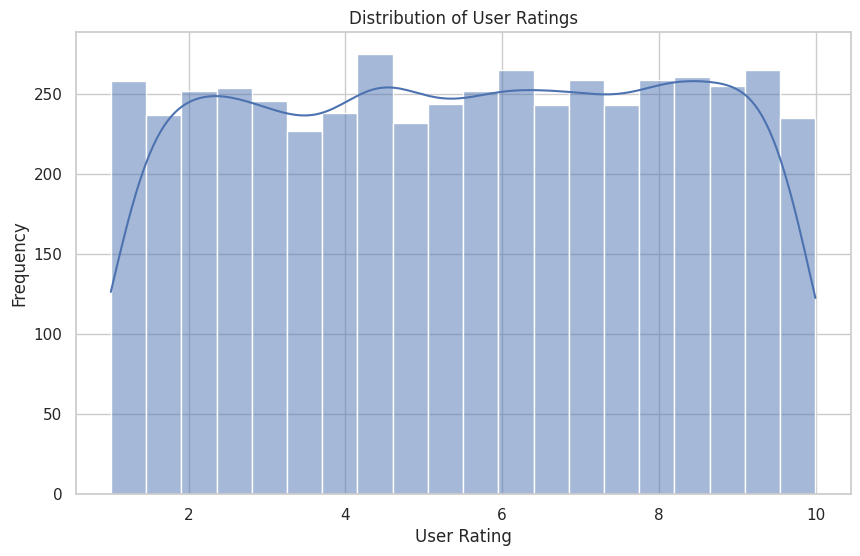

In [86]:
#Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['User Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-87-6ffded1de79f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette="viridis")


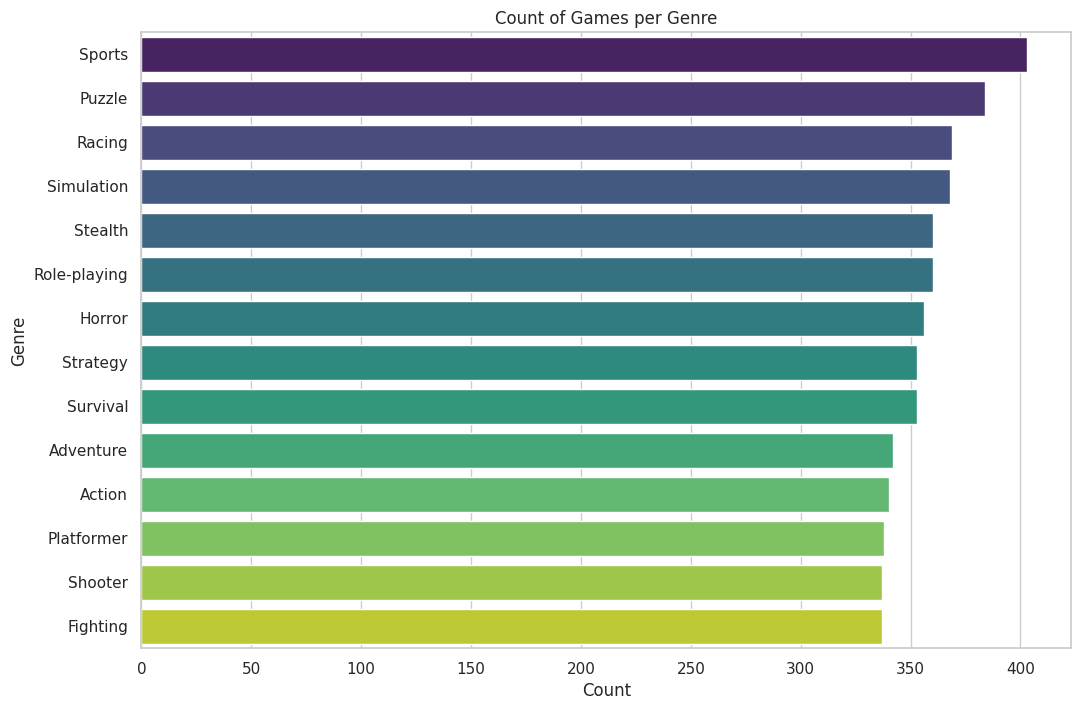

In [87]:
# count of Games per Genre
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette="viridis")
plt.title("Count of Games per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

<ipython-input-88-657c6280f9fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Platform'], order=df['Platform'].value_counts().index, palette="viridis")


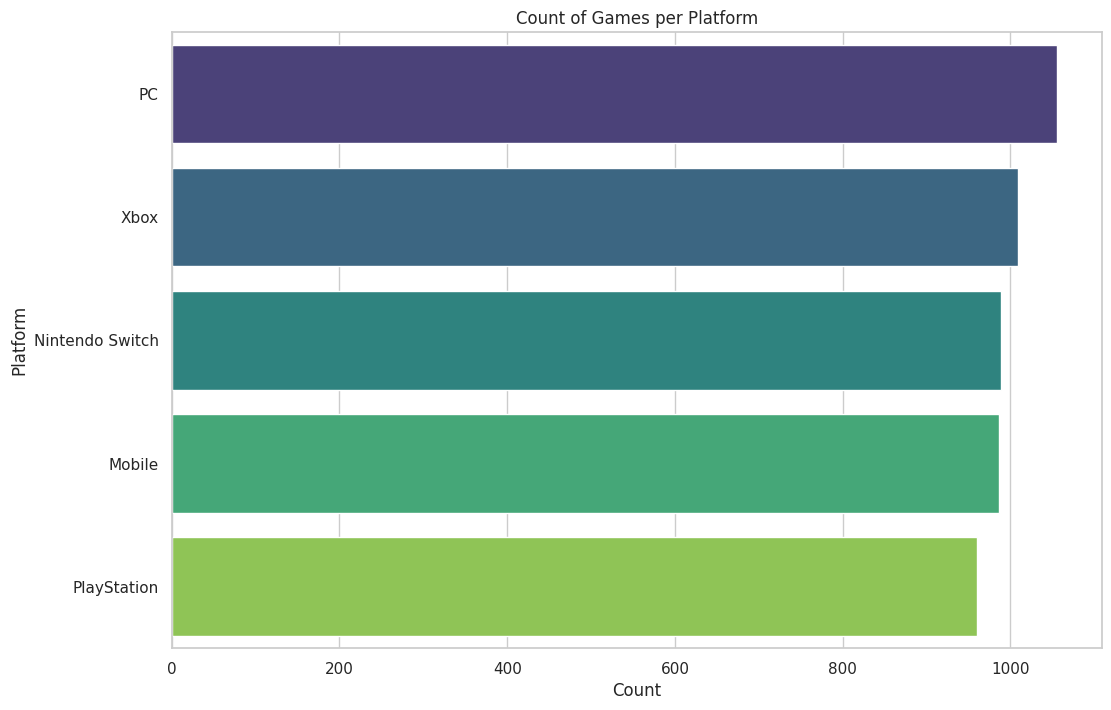

In [88]:
# Counts of Games per Platform
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Platform'], order=df['Platform'].value_counts().index, palette="viridis")
plt.title("Count of Games per Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

<ipython-input-89-c93c0013e990>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_genre, y=avg_rating_genre.index, palette="viridis")


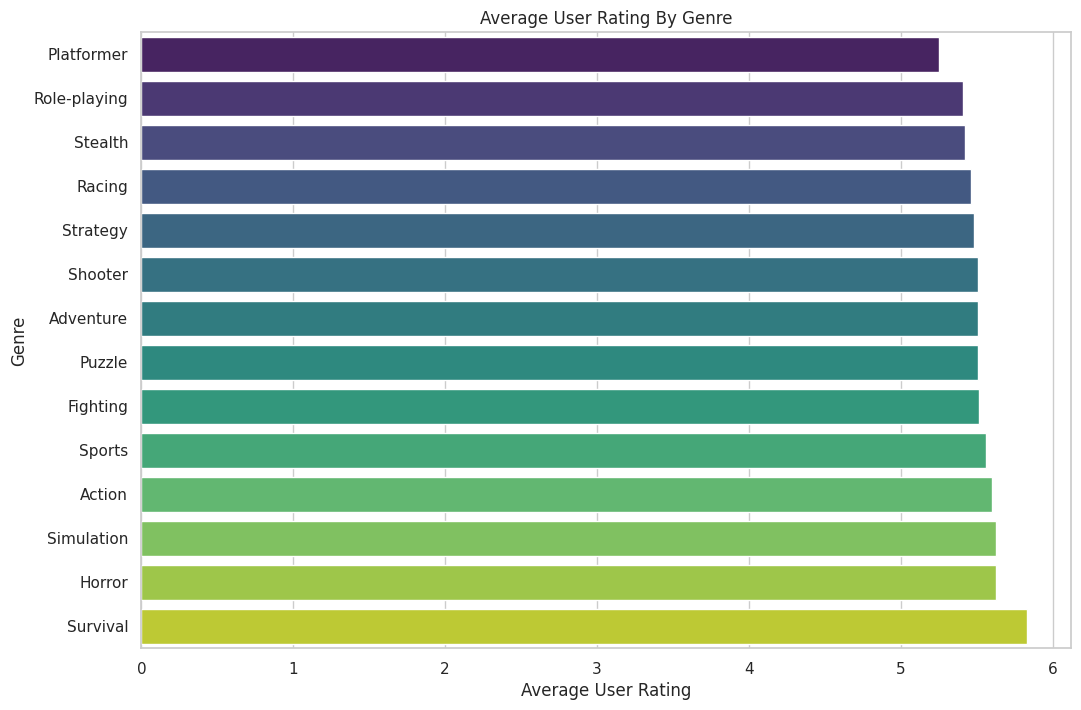

In [89]:
# Average user rating by Genre
plt.figure(figsize=(12, 8))
avg_rating_genre = df.groupby('Genre')['User Rating'].mean().sort_values()
sns.barplot(x=avg_rating_genre, y=avg_rating_genre.index, palette="viridis")
plt.title("Average User Rating By Genre")
plt.xlabel("Average User Rating")
plt.ylabel("Genre")
plt.show()

<ipython-input-90-3e1a0e687f5b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_platform, y=avg_rating_platform.index, palette="viridis")


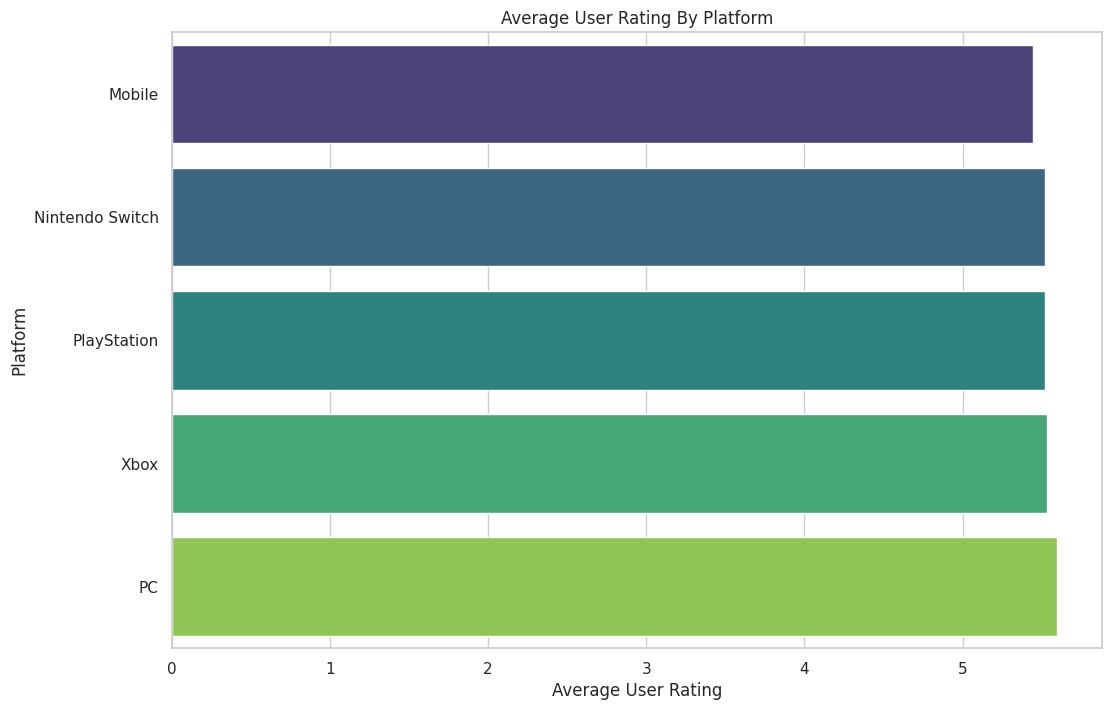

In [90]:
# Average user rating by Genre
plt.figure(figsize=(12, 8))
avg_rating_platform = df.groupby('Platform')['User Rating'].mean().sort_values()
sns.barplot(x=avg_rating_platform, y=avg_rating_platform.index, palette="viridis")
plt.title("Average User Rating By Platform")
plt.xlabel("Average User Rating")
plt.ylabel("Platform")
plt.show()

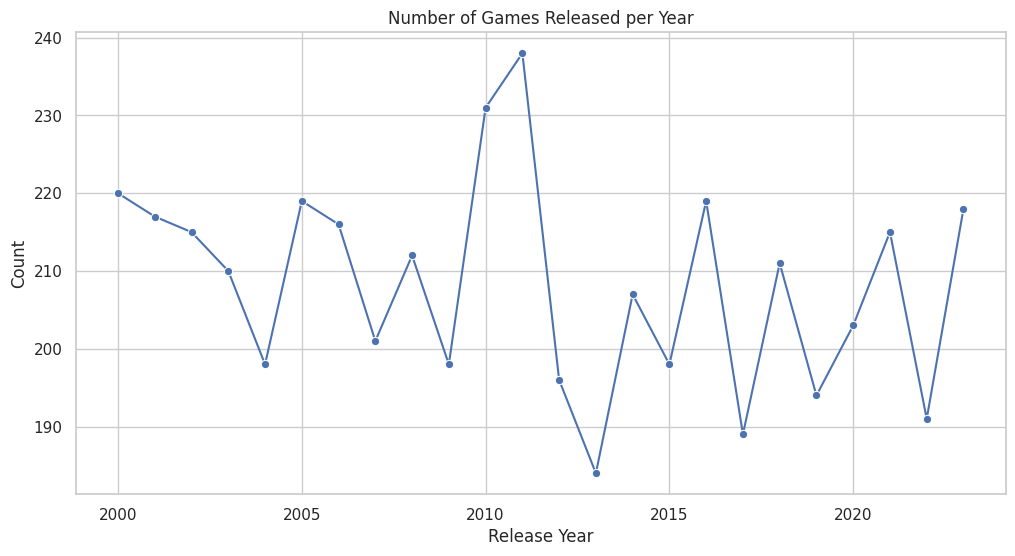

In [91]:
#number of games released per year
games_per_year = df['Release Year'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o')
plt.title('Number of Games Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

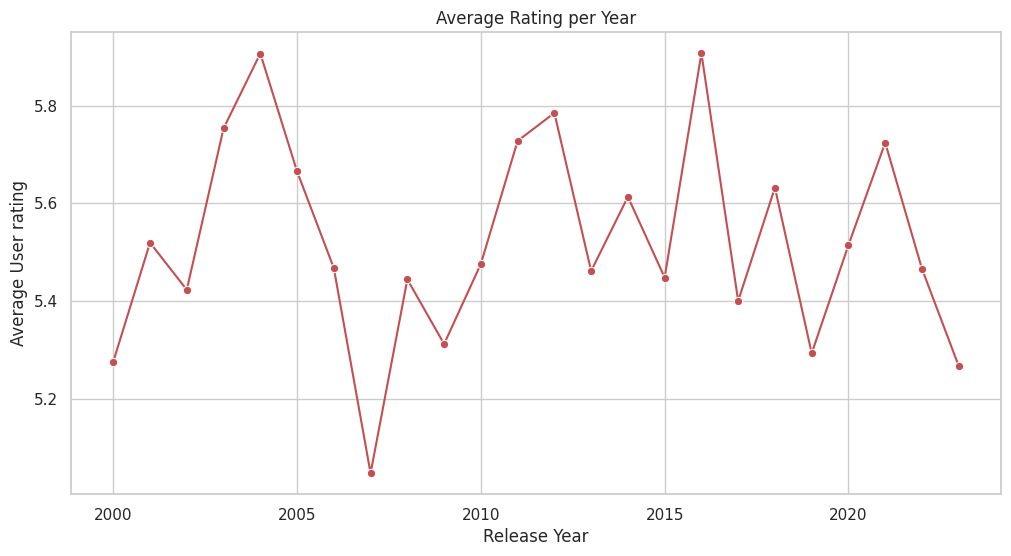

In [92]:
# average user rating per year
average_rating_per_year = df.groupby('Release Year')['User Rating'].mean()

# Plot the line chart for the average user rating per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_rating_per_year.index, y=average_rating_per_year.values, marker='o', color='r')
plt.title('Average Rating per Year')
plt.xlabel('Release Year')
plt.ylabel('Average User rating')
plt.grid(True)
plt.show()

#Buildiing Model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
# Converting categorical variables into dummy variables
df_model = pd.get_dummies(df, columns=['Genre', 'Platform'], drop_first=True)

In [95]:
X = df_model.drop(columns=['Game Name','User Rating'])
y = df_model['User Rating']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.788734382489998
R-squared: -0.006875525522725523


In [98]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
Release Year                 0.005077
Genre_Adventure             -0.103430
Genre_Fighting              -0.226403
Genre_Horror                 0.100361
Genre_Platformer            -0.412666
Genre_Puzzle                -0.213588
Genre_Racing                -0.168036
Genre_Role-playing          -0.187160
Genre_Shooter               -0.094279
Genre_Simulation            -0.057506
Genre_Sports                -0.213170
Genre_Stealth               -0.232871
Genre_Strategy              -0.205172
Genre_Survival               0.138281
Platform_Nintendo Switch     0.018297
Platform_PC                  0.185510
Platform_PlayStation         0.100626
Platform_Xbox                0.073846


<ipython-input-99-4ae2a35d5824>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette="viridis")


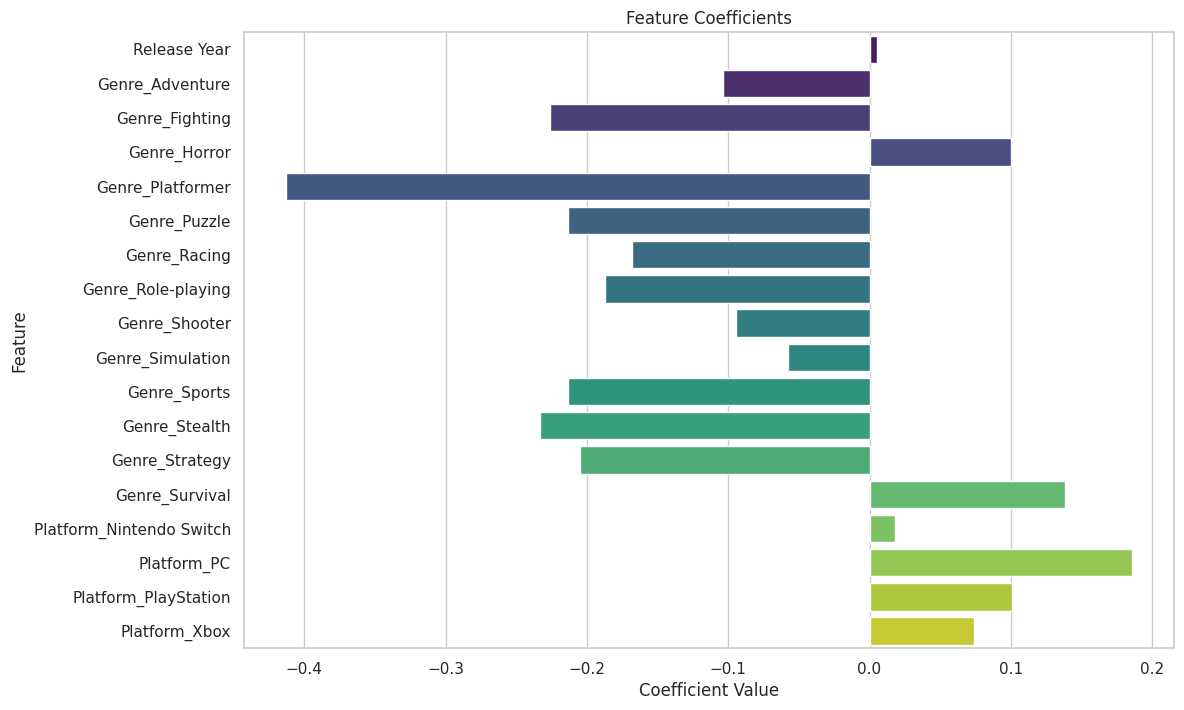

In [99]:
# Visualizing the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette="viridis")
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()